<a href="https://colab.research.google.com/github/karthikbharmanagouda/CodeDeployGitHubDemo/blob/main/finance_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ast import increment_lineno
#importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company data.csv to Company data.csv


In [ ]:
#let us go ahead and read the dataset and check the first five data
company= pd.read_csv('Company data.csv')
company.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3541 non-null   int64  
 1   Networth Next Year                           3541 non-null   float64
 2   Total assets                                 3541 non-null   float64
 3   Net worth                                    3541 non-null   float64
 4   Total income                                 3343 non-null   float64
 5   Change in stock                              3083 non-null   float64
 6   Total expenses                               3402 non-null   float64
 7   Profit after tax                             3410 non-null   float64
 8   PBDITA                                       3410 non-null   float64
 9   PBT                                          3410 non-null   float64
 10  

In [ ]:
#observations
  #all data is float
  #some columns have speacial keys like(%)

In [ ]:
#fixing messy column names (containing spaces) for ease of use

company.columns= company.columns.str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('%','perc').str.replace('/','_to_')

In [ ]:
company.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_financial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds',
       'Deposits_accepted_by_commercial_banks', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_tim

In [ ]:
print('the number of rows (observations) is',company.shape[0], '\n','number of columns (variables) is', company.shape[1])

the number of rows (observations) is 3541 
 number of columns (variables) is 52


In [ ]:
#now let us check basis measures of descriptive statistics for the continuous variable
company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [ ]:
#creating binary target variable using 'Networth_Next_Year'.
company['default']=np.where((company['Networth_Next_Year']>0),1,0)

In [ ]:
company.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31,1
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,1
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN,1
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN,1


In [ ]:
company[['default','Networth_Next_Year']].head(20)

,default,Networth_Next_Year
0,1,8890.6
1,1,394.3
2,1,92.2
3,1,2.7
4,1,109.0
5,1,688.6
6,1,246.0
7,1,13.7
8,1,291.5
9,0,-7.3


In [ ]:
company['default'].value_counts()

default
1    3298
0     243
Name: count, dtype: int64

In [ ]:
company['default'].value_counts(normalize=True)

default
1    0.931375
0    0.068625
Name: proportion, dtype: float64

In [ ]:
#here the dataset has imbalanced data

In [ ]:
company.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       198
Change_in_stock                                    458
Total_expenses                                     139
Profit_after_tax                                   131
PBDITA                                             131
PBT                                                131
Cash_profit                                        131
PBDITA_as_perc_of_total_income                      68
PBT_as_perc_of_total_income                         68
PAT_as_perc_of_total_income                         68
Cash_profit_as_perc_of_total_income                 68
PAT_as_perc_of_net_worth                             0
Sales                                              259
Income_from_financial_services                     935
Other_inco

In [ ]:
#here we are getting lots of null values

In [ ]:
company.size

187673

In [ ]:
company.isnull().sum().sum() # these are the null data in dataset

18533

In [ ]:
#spliting the columns into features and target
company_x=company.drop('default',axis=1)
company_y=company['default']

In [ ]:
company_x.head(2)

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17


In [ ]:
company_y.head(2)

0    1
1    1
Name: default, dtype: int64

In [ ]:
company.duplicated().sum()

0

In [ ]:
#handling missing values--required
#encoding --not required
#outlier treatment--required
#feature scaling --requird
#imbalance treatment --required

In [ ]:
#lets check the number of outliers per columns

Q1=company_x.quantile(0.25)
Q3=company_x.quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [ ]:
621

621

In [ ]:
((company_x > UL) | (company_x < LL)).sum()

Num                                                 0
Networth_Next_Year                                506
Total_assets                                      484
Net_worth                                         499
Total_income                                      427
Change_in_stock                                   621
Total_expenses                                    432
Profit_after_tax                                  577
PBDITA                                            483
PBT                                               576
Cash_profit                                       515
PBDITA_as_perc_of_total_income                    287
PBT_as_perc_of_total_income                       453
PAT_as_perc_of_total_income                       502
Cash_profit_as_perc_of_total_income               353
PAT_as_perc_of_net_worth                          344
Sales                                             418
Income_from_financial_services                    432
Other_income                

In [ ]:
company_x[((company_x > UL) | (company_x < LL))] = np.nan

In [ ]:
company_x.isnull().sum()

Num                                                  0
Networth_Next_Year                                 506
Total_assets                                       484
Net_worth                                          499
Total_income                                       625
Change_in_stock                                   1079
Total_expenses                                     571
Profit_after_tax                                   708
PBDITA                                             614
PBT                                                707
Cash_profit                                        646
PBDITA_as_perc_of_total_income                     355
PBT_as_perc_of_total_income                        521
PAT_as_perc_of_total_income                        570
Cash_profit_as_perc_of_total_income                421
PAT_as_perc_of_net_worth                           344
Sales                                              677
Income_from_financial_services                    1367
Other_inco

In [ ]:
((company_x > UL) | (company_x < LL)).sum()  #here we have converted the outliers into null values

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_financial_services                    0
Other_income                                      0
Total_capita

In [ ]:
company_x.isnull().sum().sum()

39981

In [ ]:
company_x.isnull().sum()*100/len(company_x)

Num                                                 0.000000
Networth_Next_Year                                 14.289749
Total_assets                                       13.668455
Net_worth                                          14.092064
Total_income                                       17.650381
Change_in_stock                                    30.471618
Total_expenses                                     16.125388
Profit_after_tax                                   19.994352
PBDITA                                             17.339735
PBT                                                19.966111
Cash_profit                                        18.243434
PBDITA_as_perc_of_total_income                     10.025417
PBT_as_perc_of_total_income                        14.713358
PAT_as_perc_of_total_income                        16.097148
Cash_profit_as_perc_of_total_income                11.889297
PAT_as_perc_of_net_worth                            9.714770
Sales                   

In [ ]:
company_x = company_x.drop(['Num','Networth_Next_Year'],axis=1)

In [ ]:
company_x.shape

(3541, 50)

In [ ]:
#now willcombine both feature and target
company_sub1=pd.concat([company_x,company_y],axis=1)

In [ ]:
company_sub1.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN,27.31,1
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,...,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,1
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN,1
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN,1


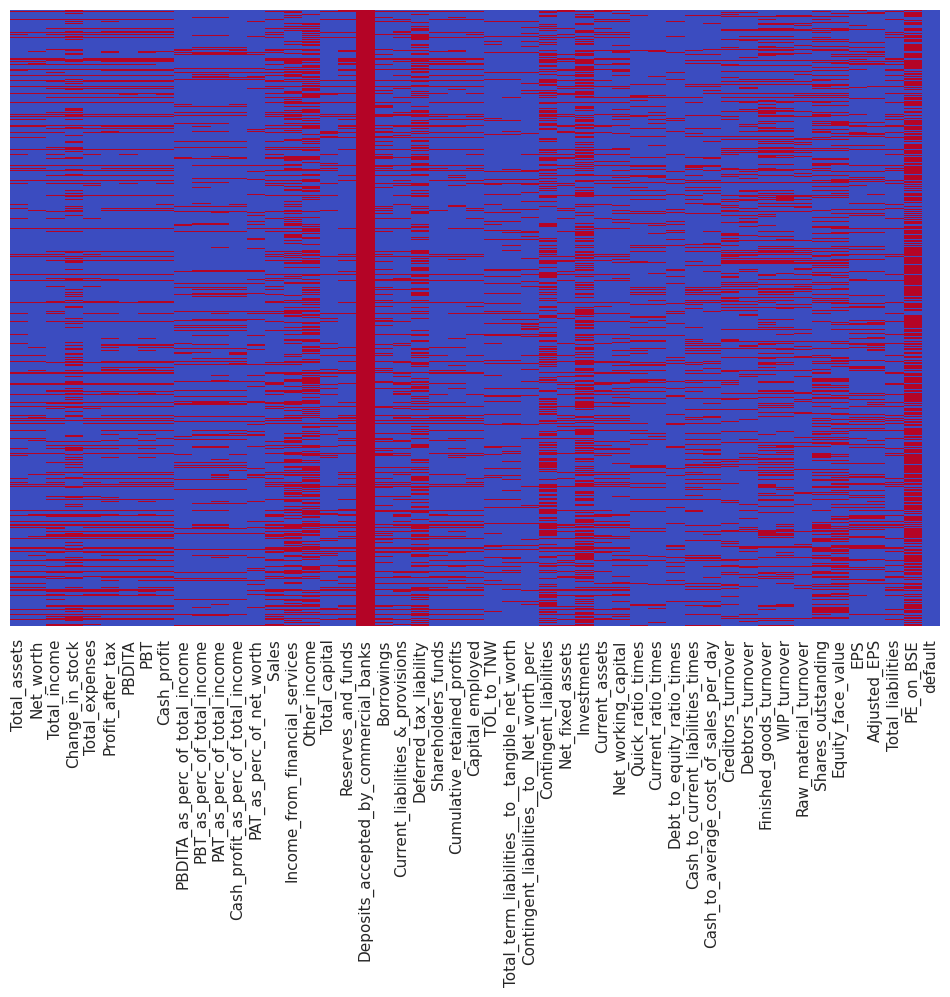

In [ ]:
#lets visually inspect missing values in our data

plt.figure(figsize=(12,8))
sns.heatmap(company_sub1.isnull(),cbar=False,cmap='coolwarm',yticklabels=False)
plt.show()

In [ ]:
#here we can bserve that red colur indicates the null values present and blue colour indicates no null values present

In [ ]:
#we should also analyse total missing values in each row
company_sub1.isnull().sum(axis=1)

0       30
1        3
2        3
3       23
4        3
        ..
3536     5
3537     7
3538     2
3539     7
3540    22
Length: 3541, dtype: int64

In [ ]:
#here we can drop the rows which contain more than 25% null values
len(company_sub1.columns)*0.25 # this gives 25% of the totalcolumns

12.75

In [ ]:
#we will consider the rows which has null values in less than 12 columns
company_sub1_temp = company_sub1[company_sub1.isnull().sum(axis=1) <= 12]

In [ ]:
company_sub1_temp.shape

(2396, 51)

In [ ]:
company_sub1_temp['default'].value_counts()

default
1    2304
0      92
Name: count, dtype: int64

In [ ]:
company_sub1_temp['default'].value_counts(normalize=True)

default
1    0.961603
0    0.038397
Name: proportion, dtype: float64

In [ ]:
#again we have imbalenced dataset
#and also it is not goodidea to drop more rows --we will miss many data(aaround 32% data will be missed)

In [ ]:
#lets consider the company_sub1 data for further work
company_sub1.shape

(3541, 51)

In [ ]:
company_sub1.isnull().sum().sort_values(ascending=False)*100/len(company_sub1)

Deposits_accepted_by_commercial_banks             100.000000
PE_on_BSE                                          67.636261
Investments                                        50.833098
Other_income                                       45.523863
Contingent_liabilities                             42.784524
Deferred_tax_liability                             41.541937
Income_from_financial_services                     38.604914
Equity_face_value                                  31.855408
Shares_outstanding                                 30.641062
Change_in_stock                                    30.471618
Finished_goods_turnover                            30.104490
WIP_turnover                                       26.998023
Borrowings                                         22.536007
Profit_after_tax                                   19.994352
PBT                                                19.966111
Net_working_capital                                19.881389
Creditors_turnover      

In [ ]:
#here we can drop the columns which have missing values more that 25%
company_sub2= company_sub1.drop(['Deposits_accepted_by_commercial_banks','PE_on_BSE','Investments',"Other_income",'Contingent_liabilities','Deferred_tax_liability','Income_from_financial_services'],axis=1)

In [ ]:
company_sub2.shape

(3541, 44)

In [ ]:
#segregate the predictors and response

predictors = company_sub2.drop('default',axis=1)
response = company_sub2['default']

In [ ]:
predictors.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,3.62,3.85,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,...,5.28,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,0.00,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,...,13.00,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5


In [ ]:
response.head()

0    1
1    1
2    1
3    1
4    1
Name: default, dtype: int64

In [ ]:
#now scaling the predictors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictor = pd.DataFrame(scaler.fit_transform(predictors),columns = predictors.columns)

In [ ]:
#now we will join both predictors and response

company_sub3 = pd.concat([scaled_predictor,response],axis=1)

In [ ]:
company_sub3.head(2)

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127839,...,-0.597170,NaN,1.143298,0.105724,NaN,0.0,NaN,1.046657,NaN,1
1,0.857364,1.040021,1.16956,2.929613,1.187136,3.369301,2.796202,NaN,2.463083,1.046692,...,-0.232877,-0.366744,-0.417817,0.744868,1.222365,0.0,1.165458,1.675933,0.857364,1


#imputing the missing values using knnimpuer


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)
company_imputed = pd.DataFrame(imputer.fit_transform(company_sub3),columns=company_sub3.columns)

In [ ]:
company_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Shareholders

In [ ]:
company_imputed.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3536    0
3537    0
3538    0
3539    0
3540    0
Length: 3541, dtype: int64

In [ ]:
predictors = company_imputed.drop('default',axis=1)
response = company_imputed['default']

#EDA PART

In [ ]:
#inspect possible correlation between independent variables

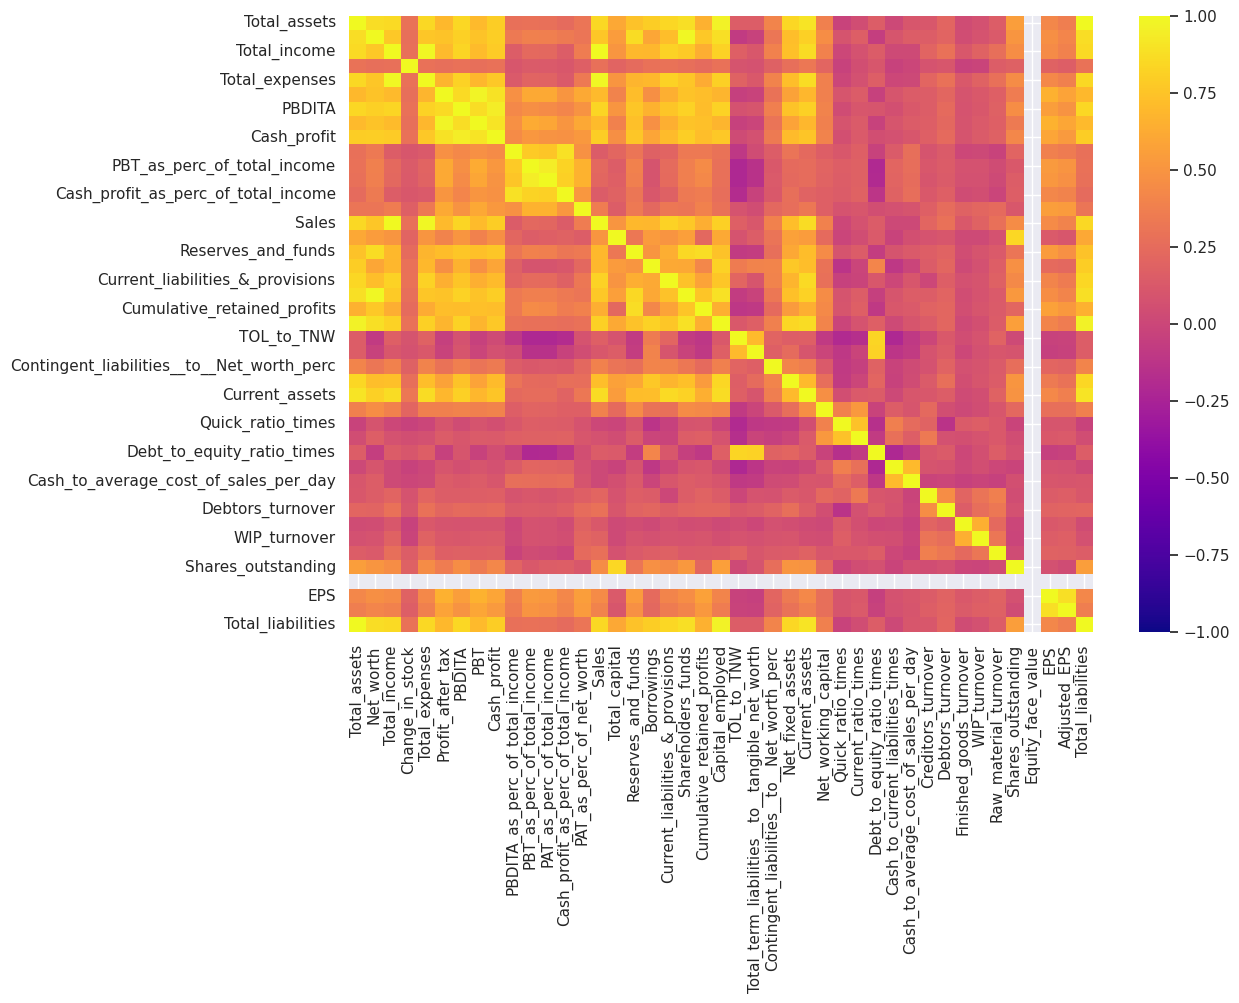

In [ ]:
plt.figure(figsize=(12,8))
corr_matrix = company_imputed.drop('default',axis=1).corr()
sns.heatmap(corr_matrix, cmap='plasma', vmin=-1,vmax=1)
plt.show()

In [ ]:
#splinting the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictors,response,test_size=0.25,random_state=2,stratify=response)

for modelling we will use logistic regression with RFE(recursive feature elimination)

In [ ]:
LogR = LogisticRegression()

In [ ]:
#n_features_to_select=15 (43/3=15)
selector = RFE(estimator=LogR,n_features_to_select=15,step=1)

In [ ]:
selector = selector.fit(x_train,y_train)

In [ ]:
selector.n_features_

15

In [ ]:
selector.ranking_

array([16, 28, 24,  1,  1, 13,  7, 12,  1,  1, 19,  1,  1, 18,  1,  2,  1,
        1, 10,  1,  1, 23, 20,  6, 26,  8,  9,  4, 21,  1,  5, 17, 27,  3,
       25,  1, 14, 11,  1, 29,  1, 15, 22])

In [ ]:
df = pd.DataFrame({'feature':scaled_predictor.columns,'Rank':selector.ranking_})
df[df['Rank']==1]

,feature,Rank
3,Change_in_stock,1
4,Total_expenses,1
8,Cash_profit,1
9,PBDITA_as_perc_of_total_income,1
11,PAT_as_perc_of_total_income,1
12,Cash_profit_as_perc_of_total_income,1
14,Sales,1
16,Reserves_and_funds,1
17,Borrowings,1
19,Shareholders_funds,1


<Axes: >

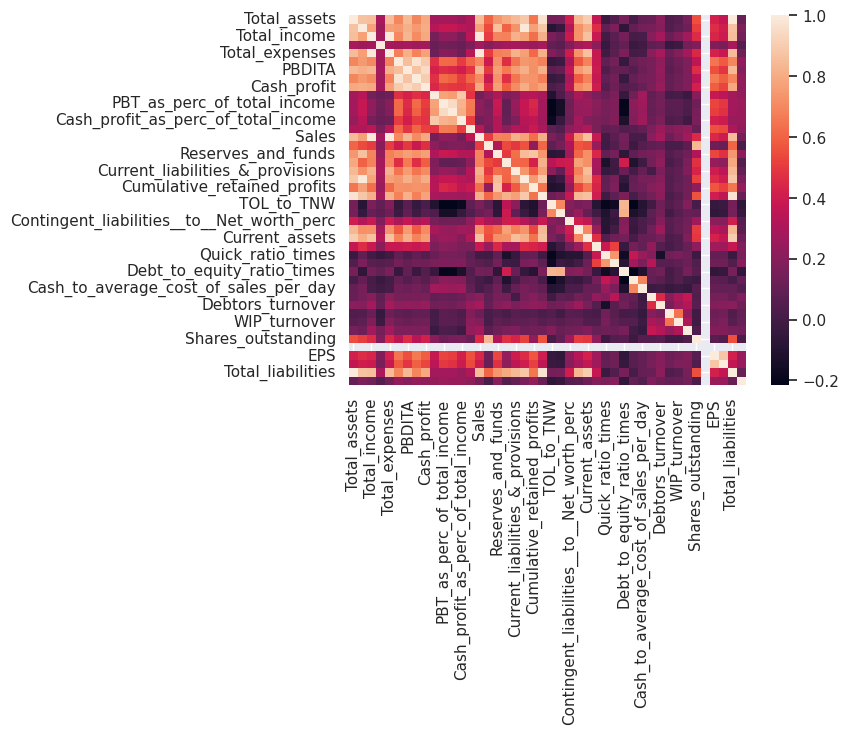

In [ ]:
#correlation analysis
sns.heatmap(company_imputed.corr())

In [ ]:
#validating the model on train and test

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
pred_train = selector.predict(x_train)
pred_test = selector.predict(x_test)

In [ ]:
print(confusion_matrix(y_train,pred_train))
print()
print(confusion_matrix(y_test, pred_test))

[[  41  141]
 [  18 2455]]

[[ 11  50]
 [  4 821]]


In [ ]:
print('training accuracy',accuracy_score(y_train,pred_train))
print()
print('test accuracy',accuracy_score(y_test, pred_test))

training accuracy 0.9401129943502825

test accuracy 0.9390519187358917


In [ ]:
print(classification_report(y_train,pred_train))
print()
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.69      0.23      0.34       182
         1.0       0.95      0.99      0.97      2473

    accuracy                           0.94      2655
   macro avg       0.82      0.61      0.65      2655
weighted avg       0.93      0.94      0.93      2655


              precision    recall  f1-score   support

         0.0       0.73      0.18      0.29        61
         1.0       0.94      1.00      0.97       825

    accuracy                           0.94       886
   macro avg       0.84      0.59      0.63       886
weighted avg       0.93      0.94      0.92       886



In [ ]:
response.value_counts(normalize=True)

default
1.0    0.931375
0.0    0.068625
Name: proportion, dtype: float64

In [ ]:
# we see poor recall score for both train and test
##since my response only7% of the total data had defaults (-1), we will try to balance the data before fitting the model.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts(normalize=True)

default
1.0    0.93145
0.0    0.06855
Name: proportion, dtype: float64

In [ ]:
y_sm.value_counts(normalize=True)

default
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

In [ ]:
#here we can observe that we are getting balanced data when we applied smoth re_sampling

In [ ]:
selector_smoth = selector.fit(x_sm,y_sm)

In [ ]:
selector_smoth.n_features_

15

In [ ]:
pred_train_smoth = selector_smoth.predict(x_sm)
pred_test_smoth = selector_smoth.predict(x_test)

In [ ]:
print('training accuracy',accuracy_score(y_sm,pred_train_smoth))
print()
print('test accuracy',accuracy_score(y_test, pred_test_smoth))

training accuracy 0.8679741205014153

test accuracy 0.8126410835214447


In [ ]:
print(classification_report(y_sm,pred_train_smoth))
print()
print(classification_report(y_test, pred_test_smoth))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      2473
         1.0       0.92      0.81      0.86      2473

    accuracy                           0.87      4946
   macro avg       0.87      0.87      0.87      4946
weighted avg       0.87      0.87      0.87      4946


              precision    recall  f1-score   support

         0.0       0.24      0.82      0.38        61
         1.0       0.98      0.81      0.89       825

    accuracy                           0.81       886
   macro avg       0.61      0.82      0.63       886
weighted avg       0.93      0.81      0.85       886



In [ ]:
#again here we are getting precision is less --this is not acceptable model.

Random forest classifier model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()

In [ ]:
select_rf = RFE(estimator=rforest,n_features_to_select=15,step=1)

In [ ]:
select_rf = select_rf.fit(x_sm,y_sm)

In [ ]:
pred_train_rf_smoth = select_rf.predict(x_sm)
pred_test_rf_smoth = select_rf.predict(x_test)

In [ ]:
print('training accuracy',accuracy_score(y_sm,pred_train_rf_smoth))
print()
print('test accuracy',accuracy_score(y_test, pred_test_rf_smoth))

training accuracy 1.0

test accuracy 0.9198645598194131


In [ ]:
print(classification_report(y_sm,pred_train_rf_smoth))
print()
print(classification_report(y_test, pred_test_rf_smoth))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         1.0       1.00      1.00      1.00      2473

    accuracy                           1.00      4946
   macro avg       1.00      1.00      1.00      4946
weighted avg       1.00      1.00      1.00      4946


              precision    recall  f1-score   support

         0.0       0.44      0.61      0.51        61
         1.0       0.97      0.94      0.96       825

    accuracy                           0.92       886
   macro avg       0.71      0.77      0.73       886
weighted avg       0.93      0.92      0.93       886



In [ ]:
#without smoth

select_rf = select_rf.fit(x_train,y_train)

In [ ]:
pred_train_rf = select_rf.predict(x_train)
pred_test_rf = select_rf.predict(x_test)

In [ ]:
print('training accuracy',accuracy_score(y_train,pred_train_rf))
print()
print('test accuracy',accuracy_score(y_test, pred_test_rf))

training accuracy 0.9996233521657251

test accuracy 0.9480812641083521


In [ ]:
#using cross validation approach
from sklearn.model_selection import cross_val_score
training = cross_val_score(select_rf,x_train,y_train,cv=10)
print('all 10 accuracy',training)
print('avg training accuracy',training.mean())
print('max training accuracy',training.max())

all 10 accuracy [0.93984962 0.94736842 0.95488722 0.93984962 0.95112782 0.9509434
 0.96981132 0.9509434  0.95471698 0.95849057]
avg training accuracy 0.9517988367144277
max training accuracy 0.969811320754717


In [ ]:
print(classification_report(y_train,pred_train_rf))
print()
print(classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       182
         1.0       1.00      1.00      1.00      2473

    accuracy                           1.00      2655
   macro avg       1.00      1.00      1.00      2655
weighted avg       1.00      1.00      1.00      2655


              precision    recall  f1-score   support

         0.0       0.71      0.41      0.52        61
         1.0       0.96      0.99      0.97       825

    accuracy                           0.95       886
   macro avg       0.84      0.70      0.75       886
weighted avg       0.94      0.95      0.94       886

